# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("house_price.csv")
raw_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


评估和清理数据

评估数据整齐度

In [3]:
raw_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
166,5320000,7800,3,1,1,yes,no,yes,no,yes,2,yes,unfurnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
99,6265000,6000,4,1,3,yes,yes,yes,no,no,0,yes,unfurnished
32,8295000,4880,4,2,2,yes,no,no,no,yes,1,yes,furnished
460,3087000,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished
273,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
239,4585000,4000,3,1,2,yes,no,no,no,no,1,no,furnished
506,2604000,2910,2,1,1,no,no,no,no,no,0,no,unfurnished


从观察上看，不存在结构性问题

评估数据干净度

In [4]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从输出上看，一共有545行数据，不存在缺失的变量值。另外 mainroad（是否位于主路）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有热水器）、airconditioning（是否有空调）、prefarea（是否位于城市首选社区）、furnishingstatus（装修状态）都是分类数据，可以把数据类型都转换为Category。


In [5]:
raw_data["mainroad"] = raw_data["mainroad"].astype('category')
raw_data["guestroom"] = raw_data["guestroom"].astype('category')
raw_data["basement"] = raw_data["basement"].astype('category')
raw_data["hotwaterheating"] = raw_data["hotwaterheating"].astype('category')
raw_data["airconditioning"] = raw_data["airconditioning"].astype('category')
raw_data["prefarea"] = raw_data["prefarea"].astype('category')
raw_data["furnishingstatus"] = raw_data["furnishingstatus"].astype('category')

评估缺失数据

从 .info() 的输出上看，不存在缺失的变量值。

评估重复数据

从变量的含义来看，所有变量都允许出现重复值，因此不需要评估重复数据

评估不一致数据

不一致数据可能存在于所有的分类变量中，因此我们要查看是否有不一样的值指代同一值的情况

In [6]:
raw_data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [7]:
raw_data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [8]:
raw_data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [9]:
raw_data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [10]:
raw_data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [11]:
raw_data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [12]:
raw_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

从输出上看，不存在不一致数据

评估无效或者错误数据

In [13]:
raw_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


不存在脱离现实意义的数据

探索数据---探索各个变量对于房价的影响

In [14]:
sns.set_palette('bright')

area：房屋面积，bedrooms：卧室数，
bathrooms：厕所，
stories：楼层数mainroad（是否位于主路）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有热水器）、airconditioning（是否有空调）、prefarea（是否位于城市首选社区）、furnishingstatus（装修状态）

房价分布

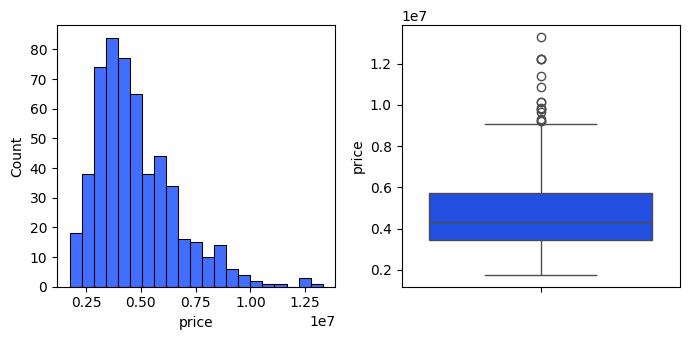

In [15]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(raw_data,x = 'price', ax = axes[0])
sns.boxplot(raw_data, y = 'price', ax = axes[1])
plt.show()

从图上看，房价呈右偏态分布，价格大多集中在中部，但也有一些极端值大的情况，拉高了平均值

面积分布

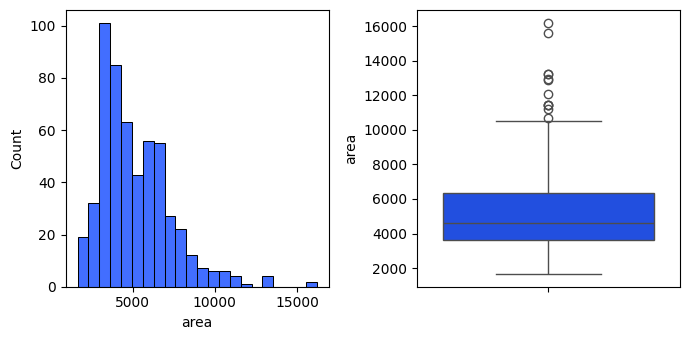

In [16]:
figure, axes = plt.subplots(1, 2)
sns.histplot(raw_data,x = 'area', ax = axes[0])
sns.boxplot(raw_data, y = 'area', ax = axes[1])
plt.show()

面积也是右偏态分布，有一部分大面积的房屋拉高了平均值

bedrooms：卧室数与房价的关系

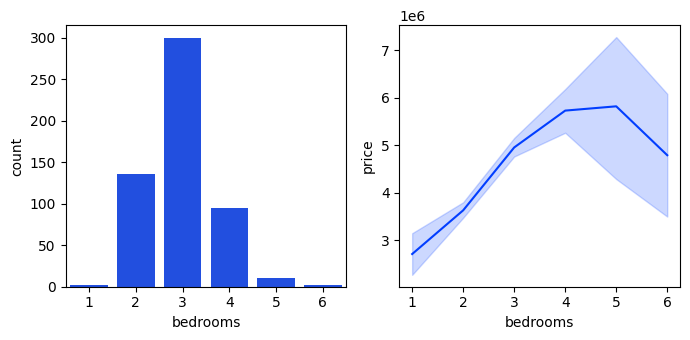

In [17]:
figure, axes = plt.subplots(1, 2)
sns.lineplot(raw_data, x = 'bedrooms', y = 'price', ax = axes[1])
sns.countplot(raw_data, x = 'bedrooms', ax = axes[0])
plt.show()

从图上可以看出，大多数的卧室数量都在2~4间，但卧室越多并不代表价格越高

bathrooms：厕所数与房价的关系

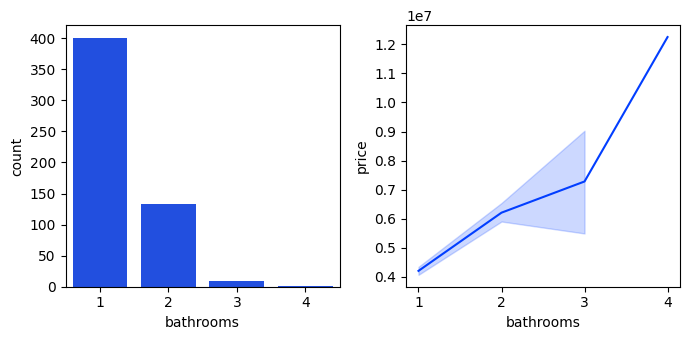

In [18]:
figure, axes = plt.subplots(1, 2)
sns.lineplot(raw_data, x = 'bathrooms', y = 'price', ax = axes[1])
sns.countplot(raw_data, x = 'bathrooms', ax = axes[0])
plt.show()

从图上可以看出，大多数房子的厕所数量都在1间，但是厕所数与房价之间大概正相关

stories：楼层数与房价的关系

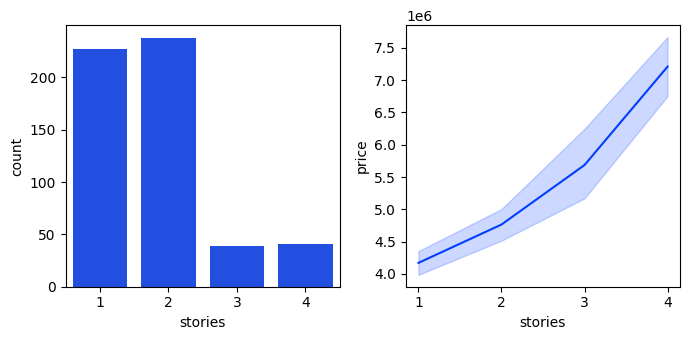

In [19]:
figure, axes = plt.subplots(1, 2)
sns.lineplot(raw_data, x = 'stories', y = 'price', ax = axes[1])
sns.countplot(raw_data, x = 'stories', ax = axes[0])
plt.show()

从图上可以看出，大多数房子的楼层数量都在1~2层，但是楼层数与房价之间大概正相关

mainroad（是否位于主路）与房价的关系

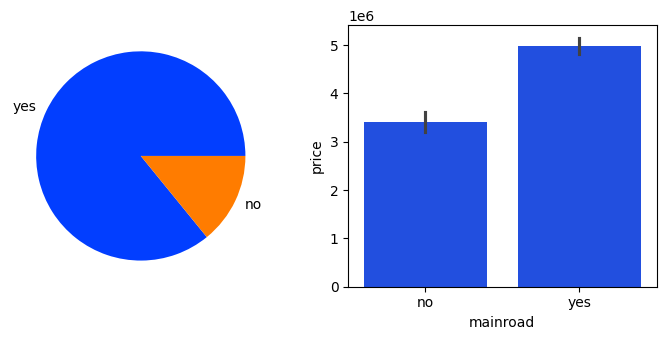

In [20]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['mainroad'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'mainroad', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是位于主路的，位于主路的房子价格更高

guestroom（是否有客房）与房价的关系

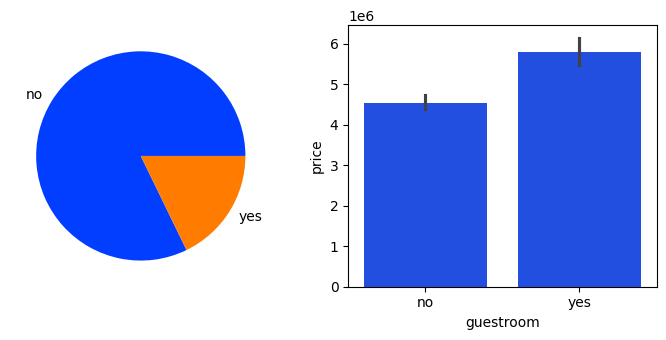

In [21]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['guestroom'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'guestroom', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是没有客房的，但是有客房的房子价格更高

basement（是否有地下室）与房价的关系

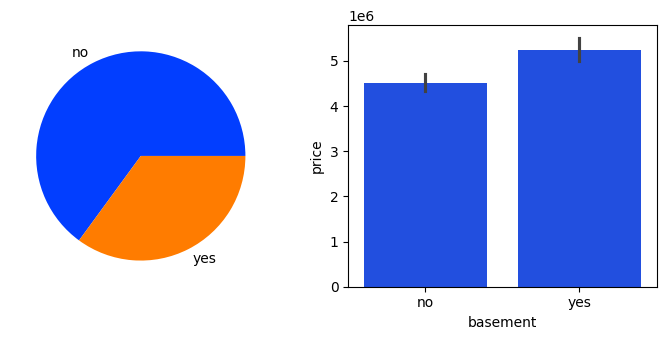

In [22]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['basement'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'basement', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是没有地下室的，但是有地下室的房子价格更高

hotwaterheating（是否有热水器）与房价的关系

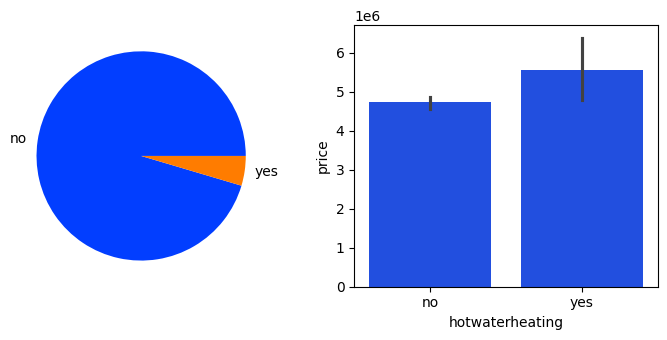

In [23]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['hotwaterheating'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'hotwaterheating', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是没有热水器的，但是有热水器的房子价格更高

airconditioning（是否有空调）与房价的关系

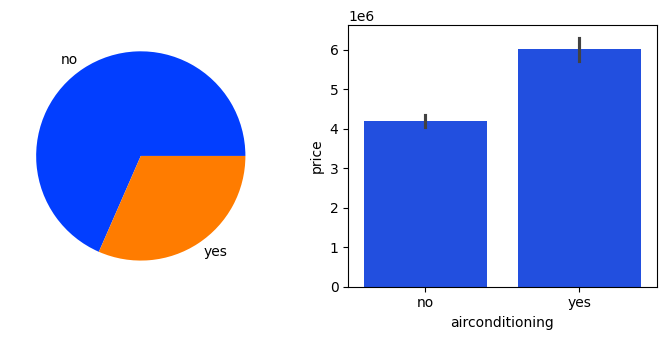

In [24]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['airconditioning'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'airconditioning', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是没有空调的，但是有空调的房子价格更高

prefarea（是否位于城市首选社区）与房价的关系

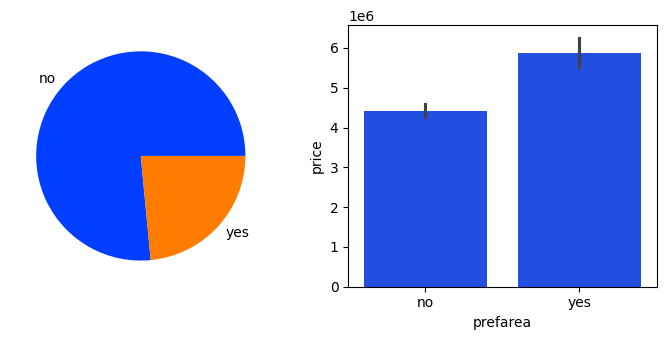

In [25]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['prefarea'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'prefarea', y = 'price', ax = axes[1])
plt.show()

本次采集的样本大多都是不位于首选社区的，但是在首选社区的房子价格更高

furnishingstatus（装修状态）与房价的关系

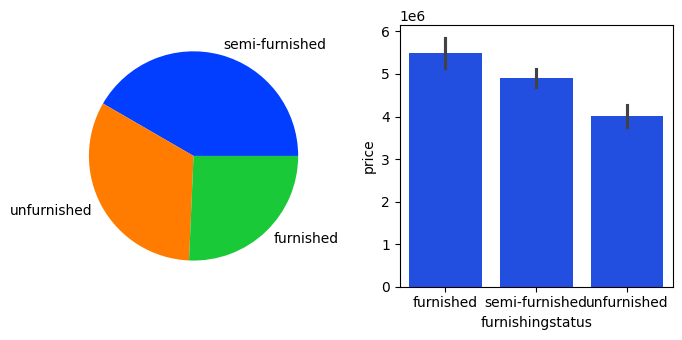

In [26]:
figure, axes = plt.subplots(1, 2)
mainroad_count = raw_data['furnishingstatus'].value_counts()
mainroad_label =mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(raw_data,x = 'furnishingstatus', y = 'price', ax = axes[1])
plt.show()

本次采集的数据简装的房子更多一些，精装的房子只占1/4左右。房价精装大于简装大于毛坯

分析数据

我们将利用线性回归来分析数据得到数学模型

In [27]:
import statsmodels.api as sm

创建一个新的Detaframe来作为数学模型的分析

In [28]:
Ir_data = raw_data.copy()

将分类变量转化为虚拟变量

In [29]:
Ir_data = pd.get_dummies(Ir_data, columns=["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], dtype = int, drop_first = True)

因为我们预测的线性回归是价格，所以因变量就是价格

In [30]:
y = Ir_data["price"]

除了价格之外的变量都是自变量

In [31]:
x = Ir_data.drop("price", axis = 1)

查看自变量之间的相关性，如果相关性很高，会导致共线性

In [32]:
x.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


我们认为相关性的绝对值大于0.8就认为它们之间有较大的相关性，会产生共线性。从输出上看，吃了本身与本身的相关性大于0.8之外，其他的相关性都小于0.8，因此不需要删除自变量

给线性方程添加截距

In [33]:
x = sm.add_constant(x)

建立线性回归模型

In [34]:
model = sm.OLS(y, x).fit()

汇总展示

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          9.07e-123
Time:                        23:19:59   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著水平设为0.05时，我们发现 bedrooms：卧室数，furnishingstatus_semi-furnished 对结果没有显著性影响，另外，常数项的p值也很大，因此我们可以把它们删掉，再建立模型

In [36]:
x = x.drop(["bedrooms","furnishingstatus_semi-furnished","const"], axis = 1)

In [37]:
model = sm.OLS(y, x).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        23:19:59   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

要预测价格的房屋的信息：面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

创建一个预测房屋的DataFrame

mainroad（是否位于主路）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有热水器）、airconditioning（是否有空调）、prefarea（是否位于城市首选社区）、furnishingstatus（装修状态）furnished 精装,
semi-furnished 简,
unfurnished ,毛坯stories：楼.层数parking：车库容量

In [46]:
predict_price = pd.DataFrame({'area':6500, 'bedrooms':4, 'bathrooms':2, 'stories':2, 'mainroad':['no'], 'guestroom':['no'],
                         'basement':['yes'], 'hotwaterheating':['yes'], 'airconditioning':['no'], 'prefarea':['yes'], 'parking':2,
                          'furnishingstatus':['semi-furnished']})
predict_price

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,parking,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,yes,2,semi-furnished


我们需要把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [47]:
predict_price["mainroad"] = pd.Categorical(predict_price["mainroad"], categories = ['yes', 'no'])
predict_price["guestroom"] = pd.Categorical(predict_price["guestroom"], categories = ['yes', 'no'])
predict_price["basement"] = pd.Categorical(predict_price["basement"], categories = ['yes', 'no'])
predict_price["hotwaterheating"] = pd.Categorical(predict_price["hotwaterheating"], categories = ['yes', 'no'])
predict_price["airconditioning"] = pd.Categorical(predict_price["airconditioning"], categories = ['yes', 'no'])
predict_price["prefarea"] = pd.Categorical(predict_price["prefarea"], categories = ['yes', 'no'])
predict_price["furnishingstatus"] = pd.Categorical(predict_price["furnishingstatus"], categories = ['furnished', 'semi-furnished','unfurnished'])


将分类变量转化为虚拟变量

In [48]:
predict_price = pd.get_dummies(predict_price, columns=["mainroad", "guestroom", "basement", 
                                                       "hotwaterheating", "airconditioning", 
                                                       "prefarea", "furnishingstatus"],
                               dtype = int, drop_first = True)
predict_price

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,prefarea_no,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,1,1,0,0,1,0,1,0


In [49]:
predict_price = predict_price.drop(["bedrooms","furnishingstatus_semi-furnished"], axis = 1)

利用线性回归方程模型预测价格

In [50]:
predict_price = model.predict(predict_price)
predict_price

0    6.997695e+06
dtype: float64

最后预测的价格是6997695.